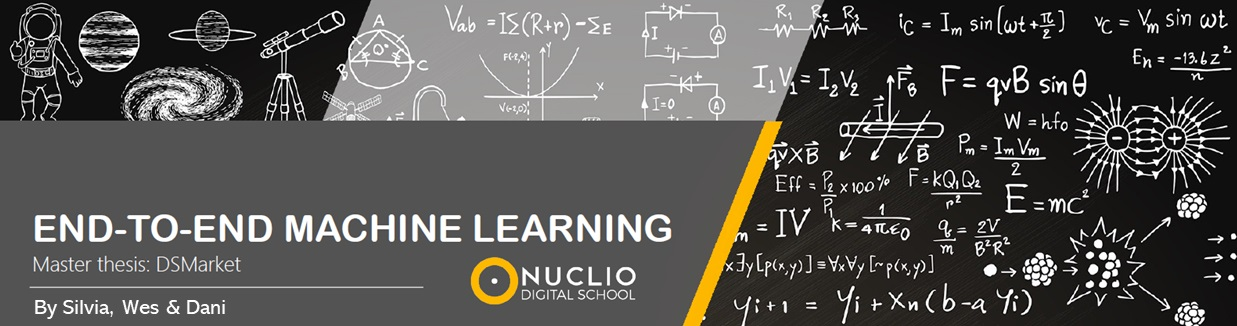

# **1. Set up del entorno y data upload**

In [1]:
# LIBRERIAS

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

#### Lectura de los datos

In [2]:
#Leí los excel para pasarlos a formato pickle y después los eliminé de la carpeta porque github no me dejaba subir archivos tan grandes

#df_calendar = pd.read_csv('C:/Users/aalei/Desktop/proyecto/ds_market_nuclio/data_dsmarket/daily_calendar_with_events.csv')
#df_prices = pd.read_csv('C:/Users/aalei/Desktop/proyecto/ds_market_nuclio/data_dsmarket/item_prices.csv')
#df_sales = pd.read_csv('C:/Users/aalei/Desktop/proyecto/ds_market_nuclio/data_dsmarket/item_sales.csv')

#### Transformar los datos .CSV a formato pickle .pkl

In [3]:
#df_calendar.to_pickle('calendar.pkl')
#df_prices.to_pickle('prices.pkl')
#df_sales.to_pickle('sales.pkl')

#### Lectura de los archivos pkl

In [2]:
df_calendar=pd.read_pickle("C:/Users/aalei/Desktop/Proyecto compartido/calendar.pkl")

In [3]:
df_prices=pd.read_pickle("C:/Users/aalei/Desktop/Proyecto compartido/prices.pkl")

In [4]:
df_sales=pd.read_pickle("C:/Users/aalei/Desktop/Proyecto compartido/sales.pkl")

# **2. Exploración de las bases de datos**

DSMarket es una pequeña cadena de tiendas en USA. Las bases de datos incluyen 8 tiendas de tres ciudades (NY, Boston & Philadelphia). Los datos consisten en tres tablas: ventas, precios y un calendario con eventos.

A evaluar: Probablemente hay algunos productos que ya no son populares y es probable que la popularidad de ciertos productos cambie entre una ciudad y otra o incluso cambie entre diferentes tiendas de una misma ciudad, por lo cual su precio debería también cambiar. La idea es que las acciones de marketing consideren estas diferencias.

### *2.1 DB Ventas*

In [6]:
df_sales.head()
#df_sales.tail()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:
df_sales.shape

(30490, 1920)

In [8]:
df_sales.info()
#df_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


### *2.2 DB Precios*

In [9]:
df_prices.head()
#df_prices.tail()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [10]:
df_prices.shape

(6965706, 5)

In [11]:
df_prices.info()
#df_price.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


### *2.3 DB Calendario*

In [12]:
df_calendar.head()
#df_calendar.tail()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [13]:
df_calendar.shape

(1913, 5)

In [15]:
df_calendar.info()
#df_calendar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


# **3. Data Cleaning**

### *3.1 Eliminación de duplicados*

##### 3.1.1 Sales
Tabla sales, no contiene duplicados.

In [16]:
df_sales[df_sales.duplicated(keep=False)]

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913


##### 3.1.2 Prices
Tabla prices tiene 212120 duplicados, los cuales corresponden al 3,04% de los datos.

In [21]:
df_prices[df_prices.duplicated(keep='first')]

,item,category,store_code,yearweek,sell_price
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
154,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000


In [17]:
len(df_prices[df_prices.duplicated(keep='first')]) * 100 / len(df_prices)

3.0452046066830842

In [18]:
df_prices_sd= df_prices.copy()

In [19]:
df_prices_sd.drop_duplicates(inplace=True)

In [20]:
df_prices_sd[df_prices_sd.duplicated(keep='first')]

,item,category,store_code,yearweek,sell_price


##### 3.1.3 Calendar

La tabla calendar no tiene duplicados.

In [21]:
df_calendar[df_calendar.duplicated(keep=False)]

,date,weekday,weekday_int,d,event


### *3.2 Identificación de Nulos*

##### 3.2.1 BD sales
Tabla sales no tiene valores nulos

In [22]:
#df_sales.isnull().any()
#df_sales.isnull().sum()
df_sales.isnull().sum().sum()

0

##### 3.2.2 BD Price
La tabla Price tiene 31800 valores nulos en la variable 'yearweek' lo que corresponde al 0,47% de los datos

In [23]:
df_prices_sd.isnull().any()

item          False
category      False
store_code    False
yearweek       True
sell_price    False
dtype: bool

In [24]:
df_prices_sd.isnull().sum().sum()

31800

In [25]:
31800 * 100 / len(df_prices_sd)

0.47086096186529647

##### 3.2.3 BD Calendar
La tabla calendar tiene 1887 valores nulos en la variable event, lo que alcanza el 98% de los datos.

In [26]:
df_calendar.isnull().any()

date           False
weekday        False
weekday_int    False
d              False
event           True
dtype: bool

In [30]:
df_calendar.isnull().sum()

date              0
weekday           0
weekday_int       0
d                 0
event          1887
dtype: int64

In [31]:
1887 * 100 / len(df_calendar)

98.64087820177731

In [32]:
df_calendar['event'].value_counts()

event
SuperBowl         6
Ramadan starts    5
Thanksgiving      5
NewYear           5
Easter            5
Name: count, dtype: int64

In [35]:
df_calendar['d'].min()

'd_1'

In [36]:
df_calendar

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN
...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN


### *3.3 Tratamiento de Nulos*

##### 3.3.1 DB Prices
Columna yearweek tiene 31800 valores nulos, los cuales corresponden al 0,47%. Se eliminan las filas con valores nulos.

In [37]:
df_prices_sd.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [38]:
null_rows = df_prices_sd.loc[df_prices_sd['yearweek'].isnull()]

In [39]:
null_rows

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
416,ACCESORIES_1_002,ACCESORIES,NYC_1,NaN,5.2801
543,ACCESORIES_1_003,ACCESORIES,NYC_1,NaN,3.9501
825,ACCESORIES_1_004,ACCESORIES,NYC_1,NaN,6.1712
1096,ACCESORIES_1_005,ACCESORIES,NYC_1,NaN,3.8304
...,...,...,...,...,...
6964850,SUPERMARKET_3_823,SUPERMARKET,PHI_3,NaN,3.5760
6965137,SUPERMARKET_3_824,SUPERMARKET,PHI_3,NaN,2.9760
6965424,SUPERMARKET_3_825,SUPERMARKET,PHI_3,NaN,4.7760
6965575,SUPERMARKET_3_826,SUPERMARKET,PHI_3,NaN,1.5360


In [40]:
df_prices2=df_prices_sd.copy()

In [41]:
df_prices2.dropna(subset=['yearweek'],inplace=True)

In [42]:
df_prices2.isnull().sum().sum()

0

##### 3.3.2 DB Calendar
Columna event tiene 1887 valores nulos, sin embargo, es información importante por lo que se reemplazan por el string 'no special event'

In [43]:
df_calendar2= df_calendar.copy()

In [45]:
df_calendar2['event'].value_counts()

event
SuperBowl         6
Ramadan starts    5
Thanksgiving      5
NewYear           5
Easter            5
Name: count, dtype: int64

In [46]:
df_calendar2.fillna('no special event', inplace = True)

In [47]:
df_calendar2['event'].value_counts()

event
no special event    1887
SuperBowl              6
Ramadan starts         5
Thanksgiving           5
NewYear                5
Easter                 5
Name: count, dtype: int64

# **4. Categorización y tratamiento de las variables**

##### 4.1 Calendar
Las variables weekday y weekday_int entregan exactamente la misma información. Se elimina la variable weekday_int.

La variable date se cambió al formato datetime.

Se crea la variable 'yearweek' para que sirva de llave con la tabla prices.

In [48]:
df_calendar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        1913 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [50]:
df_calendar2.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,no special event
1,2011-01-30,Sunday,2,d_2,no special event
2,2011-01-31,Monday,3,d_3,no special event
3,2011-02-01,Tuesday,4,d_4,no special event
4,2011-02-02,Wednesday,5,d_5,no special event


In [49]:
#La base de datos tiene información desde 29-01-2011 hasta el 24-04-2016
df_calendar2['date'].sort_values()

0       2011-01-29
1       2011-01-30
2       2011-01-31
3       2011-02-01
4       2011-02-02
           ...    
1908    2016-04-20
1909    2016-04-21
1910    2016-04-22
1911    2016-04-23
1912    2016-04-24
Name: date, Length: 1913, dtype: object

In [51]:
del(df_calendar2['weekday_int'])

In [52]:
df_calendar2['date']= pd.to_datetime(df_calendar2['date'])

In [53]:
df_calendar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1913 non-null   datetime64[ns]
 1   weekday  1913 non-null   object        
 2   d        1913 non-null   object        
 3   event    1913 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 59.9+ KB


In [55]:
#se crea la variable 'yearweek' para que sirva de llave con la tabla prices
df_calendar2['yearweek'] = df_calendar2['date'].dt.isocalendar().week

In [56]:
df_calendar2.head()

,date,weekday,d,event,yearweek
0,2011-01-29,Saturday,d_1,no special event,4
1,2011-01-30,Sunday,d_2,no special event,4
2,2011-01-31,Monday,d_3,no special event,5
3,2011-02-01,Tuesday,d_4,no special event,5
4,2011-02-02,Wednesday,d_5,no special event,5


In [57]:
df_calendar_clean=df_calendar2.copy()

In [63]:
# Las variables d_1, d_2, d_3,....d_1912,d_1913 son los productos vendidos cada día entre las fechas en estudio
df_calendar_clean['date'].max() - df_calendar_clean['date'].min()

Timedelta('1912 days 00:00:00')

##### 4.2 Prices

In [60]:
#TAREAS PENDIENTES CON LA TABLA df_prices2:
#crear una nueva variable id uniendo las variables item y store code: ACCESORIES_1_001_NYC_1, para crear una llave comun entre las tablas sales y prices
#arreglar la variable 'yearweek' para que deje de ser float

In [58]:
df_prices2.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [59]:
df_prices2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6721786 entries, 0 to 6965697
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 307.7+ MB


##### 4.3 Sales
Se creó una nueva variable 'total_item'.

In [64]:
#creando una nueva variable 'total_item'
df_sales['total_item'] = (df_sales.iloc[:, 7:1920]).sum(axis=1)

In [69]:
df_sales_cleaned= df_sales.copy()

In [70]:
df_sales_cleaned.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_item
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,1,0,1,1,2,2,2,4,1849


In [71]:
#(df_sales_cleaned.iloc[:, 0:7])['id'].value_counts()
#(df_sales_cleaned.iloc[:, 0:7])['item'].value_counts()
#(df_sales_cleaned.iloc[:, 0:7])['category'].value_counts()
#(df_sales_cleaned.iloc[:, 0:7])['department'].value_counts()
#(df_sales_cleaned.iloc[:, 0:7])['store'].value_counts()
#(df_sales_cleaned.iloc[:, 0:7])['region'].value_counts()
(df_sales_cleaned.iloc[:, 0:7])['store_code'].value_counts()

store_code
NYC_1    3049
NYC_2    3049
NYC_3    3049
NYC_4    3049
BOS_1    3049
BOS_2    3049
BOS_3    3049
PHI_1    3049
PHI_2    3049
PHI_3    3049
Name: count, dtype: int64

In [74]:
#GUARDAR LOS DATOS LIMPIOS PARA SU USO EN POWER BI
#Nota: ejecutar una sola vez.

#df_prices2.to_csv('prices_cleaned', index=False, encoding='utf-8-sig')
#df_calendar_clean.to_csv('calendar_cleaned', index=False, encoding='utf-8-sig')
#df_sales_cleaned.to_csv('sales_cleaned', index=False, encoding='utf-8-sig')